In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
data_path = "Training Project Data v0.1/"

# Task 1. Figure out all possible event types.

In [3]:
events_records = []

with open(data_path + "events.jsonl", 'r') as f:
    for line in f:
        record = json.loads(line)
        if "events" in record:
            for event in record["events"]:
                if "tags" in event:
                    event["tags"] = ",".join(event["tags"])
                events_records.append(event)
        else:
            if "tags" in record:
                record["tags"] = ",".join(record["tags"])
            events_records.append(record)

events_df = pd.DataFrame.from_records(events_records)


In [4]:
events_df = events_df.drop_duplicates()

In [5]:
events_df.head()

,user_id,video_id,event,timestamp,tags,comment
0,1,100,created,1642663347,"cute,duck,animals",NaN
1,4,100,like,1642943347,NaN,NaN
2,2,100,like,1642953347,NaN,NaN
3,2,100,commented,1642954347,NaN,"oh, it's so cute!!!!"
4,3,100,commented,1642964347,NaN,I will buy my own


In [6]:
#All possible event types
events_df.event.unique()

array(['created', 'like', 'commented', 'add_tags', 'remove_tags'],
      dtype=object)

# Task 2. Visualize videos like rate (likes count to time dashboard).

In [7]:
likes_event_df = events_df[events_df["event"] == "like"]

In [8]:
likes_event_df.head()

,user_id,video_id,event,timestamp,tags,comment
1,4,100,like,1642943347,NaN,NaN
2,2,100,like,1642953347,NaN,NaN
6,5,100,like,1642994347,NaN,NaN
7,6,100,like,1642998347,NaN,NaN
11,0,101,like,1642690000,NaN,NaN


<AxesSubplot:xlabel='timestamp', ylabel='count'>

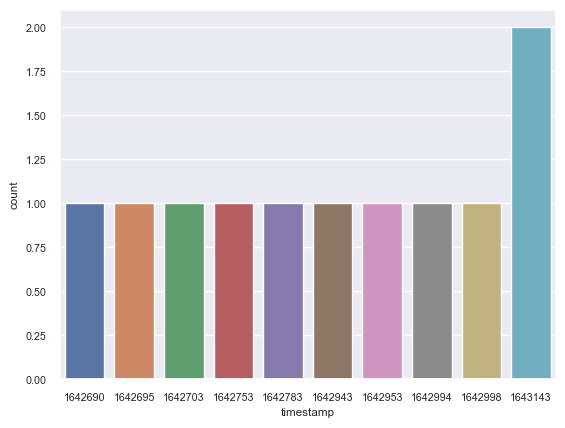

In [9]:
sns.set(font_scale=0.7)
sns.countplot(x=likes_event_df["timestamp"] // 1000)

# Task 3. 

Figure out how often each person views videos with at least one tag that is the same as one from user categories

In [10]:
created_events_df = events_df[events_df["event"] == "created"]
video_tag = dict(zip(created_events_df.video_id, created_events_df.tags))

In [47]:
video_tag

{100: 'cute,duck,animals', 101: 'travel,bicycle,mountains'}

Using all events of type "created" we can create dictionary where key is video id and value is tag which corresponds to this video.

In [11]:
user_video = dict(zip(likes_event_df.user_id, likes_event_df.video_id))

In [46]:
user_video

{4: 110, 2: 100, 5: 101, 6: 101, 0: 101, 7: 101, 1: 101}

Based on what users liked we can create dictionary where key is user id and value is id of video they watched.

In [44]:
users_df = pd.read_csv(data_path + "users.csv")
users_df_11 = pd.read_csv(data_path + "users-011.csv")
users_df = pd.concat([users_df, users_df_11])
users_df.drop_duplicates()
user_categories = dict(zip(users_df.id, users_df.categories))

In [45]:
user_categories

{0: 'animals;duck;cute;travel',
 1: 'animals;duck;bicycle',
 2: 'duck;cute;animals',
 3: 'animals;cute;travel;bicycle;mountains',
 4: 'animals;duck',
 5: 'food;cute',
 6: 'animals;food;travel;mountains',
 7: 'animals;food;travel;bicycle',
 8: 'animals;food;travel;bicycle',
 9: nan,
 10: nan,
 11: nan,
 12: 'animals;duck;travel'}

In [18]:
result = dict()
for user, video in user_video.items():
    user_tag_category[user] = [0, 0]

In [57]:
for user, video in user_video.items():
    is_tag = 0
    if user not in user_categories or video not in video_tag:
        continue
    for tag in user_categories[user].split(";"):
        is_tag = tag in video_tag[video]
    if is_tag == 1:
        user_tag_category[user][0] += 1
    elif is_tag == 0:
        user_tag_category[user][1] += 1
        

In [58]:
user_tag_category

{4: [0, 2], 2: [4, 0], 5: [2, 4], 6: [4, 0], 0: [4, 0], 7: [4, 0], 1: [4, 0]}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


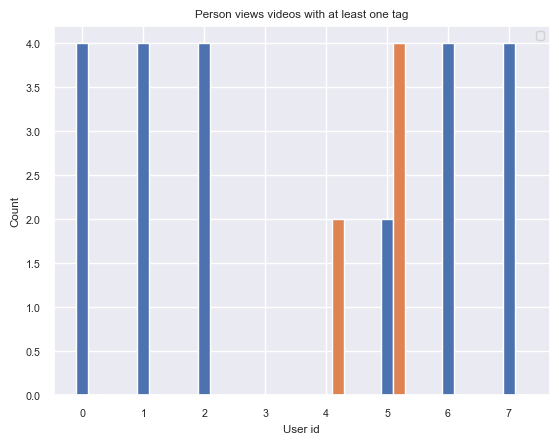

In [75]:
y1, y2 = list(zip(*user_tag_category.values()))
plt.bar(user_tag_category.keys(), y1, width=0.2)
plt.bar([el + 0.2 for el in user_tag_category.keys()], y2, width=0.2)
plt.xlabel("User id")
plt.ylabel("Count")
plt.title("Person views videos with at least one tag")
plt.legend()
plt.show()

Blue - there is at least one similar tag and category

Orange - there isn't